# 1) connect to ibm DB

make sure ibm_db is installed first
(pip install ibm_db) 

In [1]:
import ibm_db

need credentials from IBM:

IBM Cloud Dashboard -> Services -> Db2-nn -> Service credentials -> New credential -> View

In [3]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "qwk93266"        # e.g. "abc12345"
dsn_pwd = "f0^kjkpn6n2qgg3c"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [4]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=qwk93266;PWD=f0^kjkpn6n2qgg3c;


In [5]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  qwk93266 on host:  dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net


In [6]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [7]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.01.0405
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


In [8]:
ibm_db.close(conn)

True

# 2) create table

In [9]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  qwk93266 on host:  dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net


In [11]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

In [13]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTOR(id INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn, createQuery)

In [14]:
# insert first row
insertQuery = "insert into INSTRUCTOR values (1, 'Bryan', 'Zaldivar', 'HAVANA', 'CU')"
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [16]:
# insert remaining rows
records = "(2, 'Raul', 'Chong', 'Markham', 'CA')"
records =  records + ", (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"
insertQuery2 = "insert into INSTRUCTOR values" + records 
insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

In [28]:
# see the table
selectQuery = "select * from INSTRUCTOR"
selectStmt = ibm_db.exec_immediate(conn, selectQuery)
#ibm_db.fetch_both(selectStmt)
ibm_db.fetch_tuple(selectStmt)

(1, 'Bryan', 'Zaldivar', 'HAVANA', 'CU')

In [ ]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
    print (" ID:",  ibm_db.result(selectStmt, 0), 
           " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

In [ ]:
selectQuery = "select * from INSTRUCTOR"
selectStmt = ibm_db.exec_immediate(conn, selectQuery)
#while ibm_db.fetch_row(selectStmt) != False:
#    print (" ID:",  ibm_db.result(selectStmt, 0), 
#           " FNAME:",  ibm_db.result(selectStmt, 1))

while ibm_db.fetch_row(selectStmt) != False:
    print (" ID:",  ibm_db.result(selectStmt, "ID"), 
           " FNAME:",  ibm_db.result(selectStmt, "FNAME"))


In [35]:
ibm_db.close(conn)

True

# 3) simplifying things with ipython-sql

In [1]:
# first,  pip install ipython-sql
# second, pip install ibm_db_sa

%load_ext sql

search for the 'uri' field in the IBM credentials and copy-paste after the ://

In [2]:
%sql ibm_db_sa://qwk93266:f0%5Ekjkpn6n2qgg3c@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: qwk93266@BLUDB'

once sql is loaded (by doing %load_ext sql as above)

every cell starting with %sql will be interpreted by python as an sql statement

In [3]:
%sql select * from employees limit 3

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,f_name,l_name,ssn,b_date,sex,address,job_id,salary,manager_id,dep_id
E1002,Alice,Johnson,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.00,30002,5
E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,55000.00,30002,5
E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000.00,30001,2


if needing a query with multiple lines, use %%sql instead

In [3]:
%%sql

CREATE TABLE estudiantes(
    country VARCHAR(50),
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    test_score INT);

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


[]

In [4]:
%sql select * from estudiantes

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score


In [5]:
%%sql

INSERT INTO estudiantes(country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
99 rows affected.


[]

In [8]:
%sql select * from estudiantes

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


python variables can be used inside queries

In [10]:
#example of query
pais = "Canada"
%sql select * from estudiantes where country = :pais

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


queries themselves can be assigned to variables

In [11]:
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from estudiantes GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


Test Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


In [12]:
test_score_distribution[:10]

[(38, Decimal('2')),
 (40, Decimal('1')),
 (43, Decimal('2')),
 (44, Decimal('2')),
 (45, Decimal('8')),
 (46, Decimal('7')),
 (47, Decimal('4')),
 (48, Decimal('14')),
 (49, Decimal('8')),
 (50, Decimal('10'))]

save the result of your query in a file, e.g. cvs

In [13]:
test_score_distribution.csv(filename='test_score.csv')

CSV results at /home/bryan/Documents/drobox_safe/data-science/NEOLAND/SQL/practice_mysql/test_score.csv

import the file, and use it for your machine learning project!

In [14]:
import numpy as np
test_score  = np.genfromtxt('test_score.csv', dtype=None, delimiter=',', skip_header=1)

In [15]:
test_score

array([[38,  2],
       [40,  1],
       [43,  2],
       [44,  2],
       [45,  8],
       [46,  7],
       [47,  4],
       [48, 14],
       [49,  8],
       [50, 10],
       [51,  8],
       [52,  8],
       [53,  8],
       [54,  5],
       [55,  4],
       [56,  1],
       [57,  2],
       [58,  4],
       [60,  1]])

In [25]:
import matplotlib.pyplot as plt

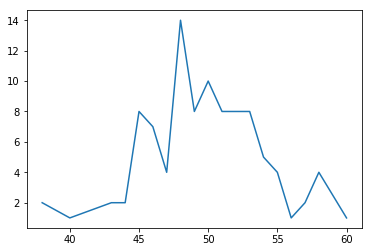

In [26]:
plt.plot(test_score[:,0],test_score[:,1])
plt.show()

# 4) working with real world data set 

In [1]:
# restart kernel first

%load_ext sql

In [4]:
%sql ibm_db_sa://qwk93266:f0%5Ekjkpn6n2qgg3c@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: qwk93266@BLUDB'

In [6]:
# make sure you have pandas installed!
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

# command below creates a table in your ibm cloud database specified above
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

In [7]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [4]:
# how many rows?
%sql SELECT COUNT(*) as count FROM chicago_socioeconomic_data;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


COUNT
78


In [16]:
# How many community areas in Chicago have a hardship index greater than 50.0?
%sql SELECT COUNT(*) as count FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


COUNT
38


In [5]:
%%sql 
SELECT COUNT(*) as count FROM chicago_socioeconomic_data
WHERE hardship_index > 50.0;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


COUNT
38


In [6]:
# What is the maximum value of hardship index in this dataset?
%sql SELECT MAX(hardship_index) as max FROM chicago_socioeconomic_data;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


MAX
98.0


In [ ]:
# Which is community area having the highest hardship index?

In [7]:
%%sql 
select community_area_name,hardship_index
from chicago_socioeconomic_data
where hardship_index =
( select max(hardship_index) 
 from chicago_socioeconomic_data )

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,hardship_index
Riverdale,98.0


In [8]:
%%sql 
SELECT community_area_name 
FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### ... using numpy/matplotlib to access/plot the results 

In [38]:
income_vs_hardship.csv(filename='income_vs_hardship.csv')

CSV results at /home/bryan/Documents/drobox_safe/data-science/NEOLAND/SQL/practice_mysql/income_vs_hardship.csv

In [71]:
import numpy as np
inc_vs_hards= np.genfromtxt('income_vs_hardship.csv', dtype=float, delimiter=',', skip_header=1)

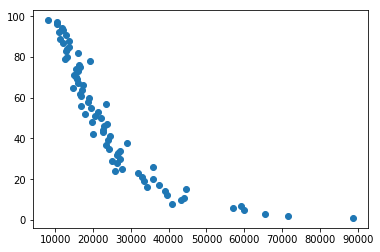

In [73]:
plt.scatter(inc_vs_hards[:,0],inc_vs_hards[:,1])

### looking at the results is briefer with seaborn library

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


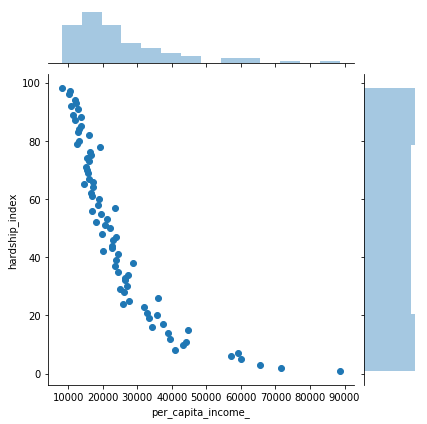

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())


# 5)working with multiple tables (JOIN command)

#### we can work with tables already existing in the IBM Cloud database

#### 1) Select the names and job start dates of all employees  who work for the department number 5

In [9]:
%%sql 
select E.F_NAME,E.L_NAME, JH.START_DATE 
    from EMPLOYEES as E 
    INNER JOIN JOB_HISTORY as JH on E.EMP_ID=JH.EMPL_ID 
    where E.DEP_ID ='5'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,start_date
Alice,James,2001-08-01
Steve,Wells,2001-08-16
Santosh,Kumar,2000-08-16
Ann,Jacob,2016-08-16


#### 2)Select the names, job start dates, and job titles of all employees who work for the department number 5

In [10]:
%%sql 
select E.F_NAME,E.L_NAME, JH.START_DATE, J.JOB_TITLE 
    from EMPLOYEES as E 
    INNER JOIN JOB_HISTORY as JH on E.EMP_ID=JH.EMPL_ID 
    INNER JOIN JOBS as J on E.JOB_ID=J.JOB_IDENT
    where E.DEP_ID ='5'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,start_date,job_title
Alice,James,2001-08-01,Sr. Software De
Ann,Jacob,2016-08-16,Sr. Designer
Steve,Wells,2001-08-16,Jr.Software Dev
Santosh,Kumar,2000-08-16,Jr.Software Dev


#### 3) Perform a Left Outer Join on the EMPLOYEES and DEPARTMENT tables and select employee id, last name, department id and department name for all employees

one can ave the results of a query in a variable, for later use

In [11]:
%%sql query3 <<
select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
    from EMPLOYEES AS E 
    LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.
Returning data to local variable query3


In [12]:
query3

emp_id,l_name,dep_id,dep_name
E1002,James,5,Software Group
E1003,Wells,5,Software Group
E1004,Kumar,5,Software Group
E1005,Hussain,2,Architect Group
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team
E1008,Gupta,7,Design Team
E1009,Jones,7,Design Team
E1010,Jacob,5,Software Group


#### 4) Re-write the query 3 to limit the result set to include only the rows for employees born before 1980

In [13]:
%%sql
select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
    from EMPLOYEES AS E 
    LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP
    where YEAR(E.B_DATE) < 1980

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,l_name,dep_id,dep_name
E1002,James,5,Software Group
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team


#### 5) Re-write the query 3 to have the result set include all the employees but department names for only the employees who were born before 1980.

In [14]:
%%sql 
select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
    from EMPLOYEES AS E 
    LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP 
    AND YEAR(E.B_DATE) < 1980

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,l_name,dep_id,dep_name
E1002,James,5,Software Group
E1003,Wells,5,None
E1004,Kumar,5,None
E1005,Hussain,2,None
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team
E1008,Gupta,7,None
E1009,Jones,7,None
E1010,Jacob,5,None


In [85]:
query5

emp_id,l_name,dep_id,dep_name
E1001,Thomas,2,Architect Group
E1002,James,5,Software Group
E1003,Wells,5,None
E1004,Kumar,5,None
E1005,Hussain,2,None
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team
E1008,Gupta,7,None
E1009,Jones,7,None
E1010,Jacob,5,None


#### 6) Perform a Full Join on the EMPLOYEES and DEPARTMENT tables and select the First name, Last name and Department name of all employees

In [87]:
%%sql query6 <<
select E.F_NAME,E.L_NAME,D.DEP_NAME
    from EMPLOYEES AS E 
    FULL OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.
Returning data to local variable query6


In [88]:
query6

f_name,l_name,dep_name
John,Thomas,Architect Group
Alice,James,Software Group
Steve,Wells,Software Group
Santosh,Kumar,Software Group
Ahmed,Hussain,Architect Group
Nancy,Allen,Architect Group
Mary,Thomas,Design Team
Bharath,Gupta,Design Team
Andrea,Jones,Design Team
Ann,Jacob,Software Group


#### 7) Re-write Query 6 to have the result set include all employee names but department id and department names only for male employees.

In [90]:
%%sql query7 <<
select E.F_NAME,E.L_NAME,D.DEPT_ID_DEP, D.DEP_NAME
    from EMPLOYEES AS E 
    FULL OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP AND E.SEX = 'M'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.
Returning data to local variable query7


In [91]:
query7

f_name,l_name,dept_id_dep,dep_name
John,Thomas,2,Architect Group
Steve,Wells,5,Software Group
Santosh,Kumar,5,Software Group
Ahmed,Hussain,2,Architect Group
Bharath,Gupta,7,Design Team
Alice,James,None,None
Nancy,Allen,None,None
Mary,Thomas,None,None
Andrea,Jones,None,None
Ann,Jacob,None,None


In [92]:
%%sql 
select E.F_NAME,E.L_NAME,D.DEPT_ID_DEP, D.DEP_NAME
    from EMPLOYEES AS E 
    FULL OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP AND E.SEX = 'M'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,dept_id_dep,dep_name
John,Thomas,2,Architect Group
Steve,Wells,5,Software Group
Santosh,Kumar,5,Software Group
Ahmed,Hussain,2,Architect Group
Bharath,Gupta,7,Design Team
Alice,James,None,None
Nancy,Allen,None,None
Mary,Thomas,None,None
Andrea,Jones,None,None
Ann,Jacob,None,None


# other stuff

### 1) see all the tables in a database

In [95]:
%%sql 
select tabschema, tabname, create_time
from syscat.tables
where tabschema = 'QWK93266'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,create_time
QWK93266,JOBS,2020-02-28 23:35:51.172811
QWK93266,DEPARTMENTS,2020-02-28 23:35:51.351188
QWK93266,LOCATIONS,2020-02-28 23:35:51.526785
QWK93266,EMPLOYEES,2020-02-28 23:35:50.768818
QWK93266,JOB_HISTORY,2020-02-28 23:35:50.998625
QWK93266,PETSALE,2020-02-29 21:45:11.079964
QWK93266,INSTRUCTOR,2020-03-01 06:55:47.969276
QWK93266,INTERNATIONAL_STUDENT_TEST_SCORES,2020-03-01 07:46:15.575979
QWK93266,CHICAGO_SOCIOECONOMIC_DATA,2020-03-01 09:07:08.211493


### 2) see all columns of a table

In [98]:
%%sql
select * from syscat.columns
where tabname = 'EMPLOYEES'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
QWK93266,EMPLOYEES,EMP_ID,0,SYSIBM,CHARACTER,9,0,OCTETS,9,None,N,1208,SYSIBM,IDENTITY,,,10,'E1009 ','E1002 ',9,1,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,F_NAME,1,SYSIBM,VARCHAR,15,0,OCTETS,15,None,N,1208,SYSIBM,IDENTITY,,,10,'Santosh','Alice',9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,5,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,L_NAME,2,SYSIBM,VARCHAR,15,0,OCTETS,15,None,N,1208,SYSIBM,IDENTITY,,,9,'Thomas','Gupta',9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,5,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,SSN,3,SYSIBM,CHARACTER,9,0,OCTETS,9,None,Y,1208,SYSIBM,IDENTITY,,,10,'123458 ','123411 ',10,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,B_DATE,4,SYSIBM,DATE,4,0,None,None,None,Y,0,None,None,,,10,'1985-07-20','1975-05-05',5,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,SEX,5,SYSIBM,CHARACTER,1,0,OCTETS,1,None,Y,1208,SYSIBM,IDENTITY,,,2,'M','F',2,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,ADDRESS,6,SYSIBM,VARCHAR,30,0,OCTETS,30,None,Y,1208,SYSIBM,IDENTITY,,,10,"'5631 Rice, OakPark,IL'","'111 Britany Springs,Elgin,IL'",28,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,23,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,JOB_ID,7,SYSIBM,CHARACTER,9,0,OCTETS,9,None,Y,1208,SYSIBM,IDENTITY,,,10,'650 ','200 ',10,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,SALARY,8,SYSIBM,DECIMAL,10,2,None,None,None,Y,0,None,None,,,7,+00090000.00,+00060000.00,7,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,EMPLOYEES,MANAGER_ID,9,SYSIBM,CHARACTER,9,0,OCTETS,9,None,Y,1208,SYSIBM,IDENTITY,,,4,'30003 ','30002 ',10,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None


## USING CHICAGO PUBLIC SCHOOLS DATA

In [ ]:
# checking if table exists in the ibm cloud

In [99]:
%sql select * from SYSCAT.TABLES where TABNAME = 'SCHOOLS'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
QWK93266,SCHOOLS,QWK93266,U,T,N,None,None,None,None,2020-03-01 11:35:43.227222,2020-03-01 11:35:43.227222,2020-03-01 11:35:43.227222,None,78,14,3534,-1,-1,-1,-1,-1,-1,-1,-1,qwk93266space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,-1,N,999,-1,-1.0,-1,-1.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,-1,2020-03-01 11:35:43.227222,0,,None,None,N,QWK93266,,,,0001-01-01,,N,R,N,-1.0,None


In [110]:
# retrieving no. of rows

In [116]:
% sql select count(*) as N_rows from SCHOOLS

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


n_rows
566


In [100]:
# retrieving the number of columns

In [109]:
%sql select count(*) as N_cols from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


n_cols
78


In [105]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'SCHOOLS'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


colname,typename,length
State,VARCHAR,2
ZIP_Code,INTEGER,4
Phone_Number,VARCHAR,14
Link,VARCHAR,78
Network_Manager,VARCHAR,40
Collaborative_Name,VARCHAR,34
Adequate_Yearly_Progress_Made_,VARCHAR,3
Track_Schedule,VARCHAR,12
CPS_Performance_Policy_Status,VARCHAR,16
CPS_Performance_Policy_Level,VARCHAR,15


In [118]:
# how many elementary schools?

In [120]:
%sql select count(*) as "no." from SCHOOLS where "Elementary, Middle, or High School" = 'ES'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


no.
462


In [121]:
# What is the highest Safety Score and which school?

In [134]:
%%sql 
select NAME_OF_SCHOOL,Safety_Score from SCHOOLS
where Safety_Score=(select MAX(Safety_Score) from SCHOOLS)

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [135]:
# What are the top 10 schools with the highest "Average Student Attendance"?

In [136]:
%%sql 
select Name_of_School, Average_Student_Attendance from SCHOOLS 
order by Average_Student_Attendance desc nulls last limit 10 

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


In [137]:
# Retrieve the list of 5 Schools with the lowest Average Student Attendance 
# sorted in ascending order based on attendance

In [141]:
%%sql 
SELECT Name_of_School, Average_Student_Attendance
from SCHOOLS
order by Average_Student_Attendance
limit 5

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


In [142]:
# Which Schools have Average Student Attendance lower than 70%?

In [143]:
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from SCHOOLS \
     where DECIMAL ( REPLACE(Average_Student_Attendance, '%', '') ) < 70 \
     order by Average_Student_Attendance

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


In [145]:
# Get the total College Enrollment for each Community Area

In [144]:
%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from SCHOOLS \
   group by Community_Area_Name 

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,total_enrollment
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


In [146]:
# Get the 5 Community Areas with the least total College Enrollment 
# sorted in ascending order

In [147]:
%%sql 
select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT 
   from SCHOOLS 
   group by Community_Area_Name 
   order by TOTAL_ENROLLMENT asc 
   limit 5

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,total_enrollment
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


In [148]:
# Get the hardship index for the community area which has College Enrollment of 4638

In [155]:
%%sql 
select hardship_index 
   from chicago_socioeconomic_data CD, schools CPS 
   where CD.ca = CPS.community_area_number 
      and college_enrollment = 4368

Exception closing connection <ibm_db_dbi.Connection object at 0x7fb0869f29e8>
Traceback (most recent call last):
  File "/home/bryan/.local/lib/python3.5/site-packages/ibm_db_dbi.py", line 1222, in _prepare_helper
    self.stmt_handler = ibm_db.prepare(self.conn_handler, operation)
Exception: [IBM][CLI Driver] CLI0106E  Connection is closed. SQLSTATE=08003 SQLCODE=-99999

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/bryan/.local/lib/python3.5/site-packages/sqlalchemy/engine/base.py", line 1246, in _execute_context
    cursor, statement, parameters, context
  File "/home/bryan/.local/lib/python3.5/site-packages/ibm_db_sa/ibm_db.py", line 112, in do_execute
    cursor.execute(statement, parameters)
  File "/home/bryan/.local/lib/python3.5/site-packages/ibm_db_dbi.py", line 1354, in execute
    self._prepare_helper(operation)
  File "/home/bryan/.local/lib/python3.5/site-packages/ibm_db_dbi.py", line 1225, in _prepar

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.OperationalError) ibm_db_dbi::OperationalError: [IBM][CLI Driver] CLI0106E  Connection is closed. SQLSTATE=08003 SQLCODE=-99999
[SQL: select hardship_index 
   from chicago_socioeconomic_data CD, schools CPS 
   where CD.ca = CPS.community_area_number 
      and college_enrollment = 4368]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [150]:
# Get the hardship index for the community area 
# which has the highest value for College Enrollment¶

In [151]:
%%sql 
select ca, community_area_name, hardship_index from chicago_socioeconomic_data 
   where ca in 
   ( select community_area_number from schools order by college_enrollment desc limit 1 )

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


ca,community_area_name,hardship_index
5.0,North Center,6.0


# Working with several tables, Chicago data

In [1]:
# restart kernel first

%load_ext sql

In [2]:
%sql ibm_db_sa://qwk93266:f0%5Ekjkpn6n2qgg3c@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: qwk93266@BLUDB'

In [153]:
# find total number of records in Crime table

In [5]:
%sql select count(*) as n_rows from CRIME;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


n_rows
533


In [6]:
# retrieve first 10 rows from Crime table

In [8]:
%sql select * from CRIME limit 10;

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


id,case_number,DATE,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,updatedon,latitude,longitude,location
3512276,HK587712,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14,58,6,1155838,1873050,2004,2018-02-10 15:50:01,41.80744050,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27,23,6,1152206,1906127,2004,2018-02-28 15:56:25,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3,38,6,1177436,1876313,2011,2018-02-10 15:50:01,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7,46,6,1194622,1850125,2010,2018-02-10 15:50:01,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15,66,6,1155240,1860661,2016,2018-02-10 15:50:01,41.77345530,-87.70648047,"(41.773455295, -87.706480471)"
7732712,HS540106,2010-09-29 07:59:00,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),FALSE,FALSE,1323,12,27,24,6,1171668,1905607,2010,2018-02-10 15:50:01,41.89644677,-87.64493868,"(41.896446772, -87.644938678)"
10769475,HZ534771,2016-11-30 01:15:00,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,1713,17,33,14,6,1154133,1933314,2016,2018-02-10 15:50:01,41.97284491,-87.70860008,"(41.972844913, -87.708600079)"
4494340,HL793243,2005-12-16 16:45:00,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,TRUE,FALSE,213,2,3,38,6,1180448,1879234,2005,2018-02-28 15:56:25,41.82387989,-87.61350386,"(41.823879885, -87.613503857)"
3778925,HL149610,2005-01-28 17:00:00,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,2211,22,19,72,6,1160129,1838040,2005,2018-02-28 15:56:25,41.71128051,-87.68917910,"(41.711280513, -87.689179097)"
3324217,HK361551,2004-05-13 14:15:00,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,FALSE,FALSE,1733,17,35,21,6,1153590,1921084,2004,2018-02-28 15:56:25,41.93929582,-87.71092344,"(41.939295821, -87.710923442)"


In [9]:
# How many crimes involve an arrest?

In [13]:
%%sql 
select count(*) as n_arrest from CRIME
where arrest=TRUE

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


n_arrest
163


In [14]:
# Which unique types of crimes have been recorded at GAS STATION locations?

In [29]:
%%sql 
select distinct(primary_type) from CRIME
where location_description = 'GAS STATION'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


primary_type
CRIMINAL TRESPASS
NARCOTICS
ROBBERY
THEFT


In [30]:
# In the CENUS_DATA table list all Community Areas whose names start with the letter ‘B’.

In [31]:
%sql select * from CENSUS limit 5

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16__unemployed,percent_aged_25__without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income,hardship_index
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [32]:
%%sql 
select community_area_name from CENSUS 
where community_area_name like 'B%'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Belmont Cragin
Burnside
Brighton Park
Bridgeport
Beverly


In [33]:
# Which schools in Community Areas 10 to 15 are healthy school certified?

In [45]:
%sql select * from syscat.columns where tabname = 'SCHOOLS'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
QWK93266,SCHOOLS,State,5,SYSIBM,VARCHAR,2,0,OCTETS,2,None,Y,1208,SYSIBM,IDENTITY,,,1,'IL','IL',7,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,2,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,ZIP_Code,6,SYSIBM,INTEGER,4,0,None,None,None,Y,0,None,None,,,51,60707,60607,5,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,Phone_Number,7,SYSIBM,VARCHAR,14,0,OCTETS,14,None,Y,1208,SYSIBM,IDENTITY,,,566,'(773) 535-9930','(773) 534-0146',19,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,14,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,Link,8,SYSIBM,VARCHAR,78,0,OCTETS,78,None,Y,1208,SYSIBM,IDENTITY,,,2,'','http://schoolreports.cps.edu/Scho',83,None,0,20,10,1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,78,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,Network_Manager,9,SYSIBM,VARCHAR,40,0,OCTETS,40,None,Y,1208,SYSIBM,IDENTITY,,,20,'Southwest Side High School Networ','Austin-North Lawndale Elementary ',35,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,30,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,Collaborative_Name,10,SYSIBM,VARCHAR,34,0,OCTETS,34,None,Y,1208,SYSIBM,IDENTITY,,,5,'SOUTHWEST SIDE COLLABORATIVE','NORTH-NORTHWEST SIDE COLLABORATIV',33,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,28,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,Adequate_Yearly_Progress_Made_,11,SYSIBM,VARCHAR,3,0,OCTETS,3,None,Y,1208,SYSIBM,IDENTITY,,,3,'Yes','NDA',7,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,2,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,Track_Schedule,12,SYSIBM,VARCHAR,12,0,OCTETS,12,None,Y,1208,SYSIBM,IDENTITY,,,3,'Track_E','Non_Standard',13,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,8,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,CPS_Performance_Policy_Status,13,SYSIBM,VARCHAR,16,0,OCTETS,16,None,Y,1208,SYSIBM,IDENTITY,,,4,'Not on Probation','Not Applicable',18,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,13,None,None,N,N,N,-1,-1.0,None,None,N,None
QWK93266,SCHOOLS,CPS_Performance_Policy_Level,14,SYSIBM,VARCHAR,15,0,OCTETS,15,None,Y,1208,SYSIBM,IDENTITY,,,5,'NDA','Level 2',12,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,7,None,None,N,N,N,-1,-1.0,None,None,N,None


In [40]:
%%sql
select name_of_school,community_area_number from schools
where healthy_school_certified = 'Yes'
and community_area_number between 10 and 15

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,community_area_number
Rufus M Hitch Elementary School,10


In [41]:
# What is the average school Safety Score? 

In [43]:
%sql select avg(safety_score) as average from schools

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


average
49.504873


In [46]:
# List the top 5 Community Areas by average College Enrollment [number of students]

In [58]:
%%sql 
select community_area_name, AVERAGE_STUDENT_ATTENDANCE from schools 
where AVERAGE_STUDENT_ATTENDANCE is not null
order by AVERAGE_STUDENT_ATTENDANCE desc 
limit 5

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,average_student_attendance
ARMOUR SQUARE,98.40%
ARMOUR SQUARE,97.80%
PULLMAN,97.60%
GAGE PARK,97.60%
LOWER WEST SIDE,97.60%


In [88]:
%%sql 
select community_area_name, 
AVG(DECIMAL ( REPLACE(Average_Student_Attendance, '%', '') )) as ave
from schools 
group by community_area_name
order by ave desc
limit 5

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,ave
ARMOUR SQUARE,96.0000000000000000
FOREST GLEN,96.0000000000000000
BURNSIDE,96.0000000000000000
AVONDALE,95.7500000000000000
BEVERLY,95.7500000000000000


In [89]:
# Use a sub-query to determine which Community Area 
#has the least value for school Safety Score?

In [164]:
%%sql 
select community_area_name from schools
where safety_score = 
(select min(safety_score) from schools)

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
WASHINGTON PARK


In [94]:
# [Without using an explicit JOIN operator] Find the Per Capita Income of 
# the Community Area which has a school Safety Score of 1.

In [194]:
%%sql
select community_area_name, per_capita_income
from census
where community_area_name = 
cast( (select community_area_name from schools
where safety_score = 
(select min(safety_score) from schools)) as varchar(20))

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,per_capita_income


In [149]:
%%sql
select community_area_name, per_capita_income from census
where community_area_name = 'Washington Park'


 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,per_capita_income
Washington Park,13785


In [176]:
%%sql
select S.community_area_name, S.safety_score, C.per_capita_income
from census C, schools S
where safety_score = 1

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name,safety_score,per_capita_income
WASHINGTON PARK,1,23939
WASHINGTON PARK,1,23040
WASHINGTON PARK,1,35787
WASHINGTON PARK,1,37524
WASHINGTON PARK,1,57123
WASHINGTON PARK,1,60058
WASHINGTON PARK,1,71551
WASHINGTON PARK,1,88669
WASHINGTON PARK,1,40959
WASHINGTON PARK,1,32875


In [172]:
%%sql 
select name_of_school, community_area_name from schools
where safety_score = 1

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,community_area_name
Edmond Burke Elementary School,WASHINGTON PARK


In [169]:
%%sql 
select name_of_school,community_area_name,safety_score 
from schools
where community_area_name = 'EDGEWATER'

 * ibm_db_sa://qwk93266:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,community_area_name,safety_score
George B Swift Elementary Specialty School,EDGEWATER,61
Helen Peirce International Studies Elementary School,EDGEWATER,58
Hyman G Rickover Naval Academy High School,EDGEWATER,64
Lyman Trumbull Elementary School,EDGEWATER,56
Nicholas Senn High School,EDGEWATER,48
Stephen K Hayt Elementary School,EDGEWATER,72
